In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [25]:
df = pd.read_csv('credit_risk.csv')
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [26]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [27]:
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [28]:
df['Home'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: ylabel='count'>

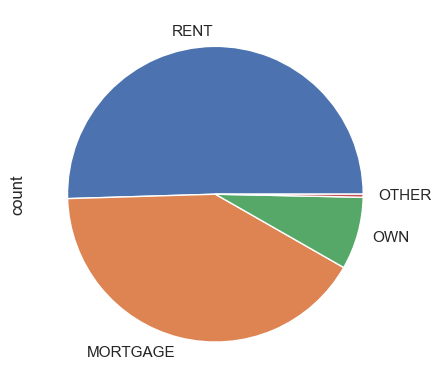

In [29]:
df['Home'].value_counts().plot(kind='pie')

In [30]:
df['Age'].unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

In [31]:
df['Income'].unique()

array([  59000,    9600,   65500, ...,  720000, 1900000,    4888],
      dtype=int64)

In [32]:
df['Rate'].unique()

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89,   nan,
       17.99, 12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96,
       11.48,  5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,
        9.91, 13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88,
       12.18, 13.99,  5.42, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64,
       16.35, 18.67, 10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22,
       11.86, 13.43, 15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65,
       13.04, 17.04, 14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,
        6.17, 16.32, 14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79,
       13.11,  6.54, 12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68,
       14.46, 13.47,  6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 ,
       15.37, 14.26,

In [33]:
df.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [34]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [35]:
cleaned_df = df.dropna()

In [36]:
cleaned_df.isnull().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [37]:
train, test = train_test_split(cleaned_df, test_size=0.2, random_state=42)

In [39]:
train.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
14324,14324,25,105000,MORTGAGE,2.0,DEBTCONSOLIDATION,9600,11.71,0,0.09,N,3
5698,5698,23,150000,RENT,3.0,VENTURE,5000,10.65,0,0.03,N,2
22936,22936,34,35000,RENT,1.0,PERSONAL,8000,6.17,0,0.23,N,9
23963,23963,31,68000,MORTGAGE,15.0,PERSONAL,13600,7.88,0,0.20,N,9
5750,5750,26,25300,RENT,2.0,HOMEIMPROVEMENT,5400,16.02,1,0.21,Y,2


In [40]:
train.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

In [41]:
Model = RandomForestClassifier()

In [43]:
# Splitting our train dataset into features and target
# x_train = features
# y_train = target
target = "Default"
x_train = train.drop(target, axis=1)
y_train = train[target]



In [44]:
#future engineering

cat = []
for i in x_train.columns:
    if x_train[i].dtype == "object":
         cat.append(i)

num = []
for i in  x_train.columns:
    if  x_train[i].dtype == "int64" or train[i].dtype == "float64":
         num.append(i)
num

['Id',
 'Age',
 'Income',
 'Emp_length',
 'Amount',
 'Rate',
 'Status',
 'Percent_income',
 'Cred_length']

In [45]:
cat = []
for i in x_train.columns:
    if x_train[i].dtype == "object":
         cat.append(i)

num = []
for i in  x_train.columns:
    if  x_train[i].dtype == "int64" or train[i].dtype == "float64":
         num.append(i)

In [46]:
cat

['Home', 'Intent']

In [47]:
cat_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
])

num_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_trans, num),
        ("cat", cat_trans, cat)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

In [48]:
x_train.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length
14324,14324,25,105000,MORTGAGE,2.0,DEBTCONSOLIDATION,9600,11.71,0,0.09,3
5698,5698,23,150000,RENT,3.0,VENTURE,5000,10.65,0,0.03,2
22936,22936,34,35000,RENT,1.0,PERSONAL,8000,6.17,0,0.23,9
23963,23963,31,68000,MORTGAGE,15.0,PERSONAL,13600,7.88,0,0.20,9
5750,5750,26,25300,RENT,2.0,HOMEIMPROVEMENT,5400,16.02,1,0.21,2


In [49]:
pipe_fit = pipeline.fit(x_train)

c:\Users\USER\Desktop\phython\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
x_train1 = pd.DataFrame(pipe_fit.transform(x_train), columns = pipe_fit.get_feature_names_out().tolist())

In [51]:
x_train1.head()

,num__Id,num__Age,num__Income,num__Emp_length,num__Amount,num__Rate,num__Status,num__Percent_income,num__Cred_length,cat__Home_OTHER,cat__Home_OWN,cat__Home_RENT,cat__Intent_EDUCATION,cat__Intent_HOMEIMPROVEMENT,cat__Intent_MEDICAL,cat__Intent_PERSONAL,cat__Intent_VENTURE
0,0.436974,0.040323,0.016845,0.016260,0.263768,0.368699,0.0,0.108434,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.173826,0.024194,0.024350,0.024390,0.130435,0.306565,0.0,0.036145,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.699695,0.112903,0.005170,0.008130,0.217391,0.043962,0.0,0.277108,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.731025,0.088710,0.010674,0.121951,0.379710,0.144197,0.0,0.240964,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.175412,0.048387,0.003552,0.016260,0.142029,0.621336,1.0,0.253012,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [52]:
num

['Id',
 'Age',
 'Income',
 'Emp_length',
 'Amount',
 'Rate',
 'Status',
 'Percent_income',
 'Cred_length']

<Axes: >

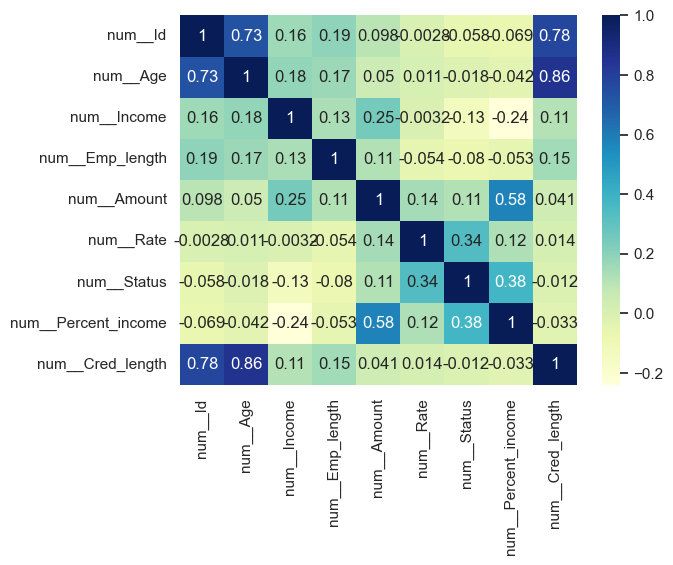

In [56]:
# Check for multicollinearity: There is column that reaches 0.9. So, there is multicollinearity
cors = x_train1[['num__Id',	'num__Age',	'num__Income',	'num__Emp_length',	'num__Amount',	'num__Rate', 'num__Status',	'num__Percent_income',	'num__Cred_length']].corr()
sns.heatmap(cors, annot=True, cmap="YlGnBu")

In [57]:
# Feature Importance
dt = DecisionTreeClassifier()
dt.fit(x_train1, y_train)
predictors = x_train1.columns

coef = pd.Series(dt.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
num__Rate,0.472586
num__Id,0.114628
num__Income,0.082355
num__Percent_income,0.056305
num__Amount,0.055765
num__Age,0.054225
num__Emp_length,0.053723
num__Cred_length,0.041639
cat__Intent_MEDICAL,0.011469
cat__Intent_PERSONAL,0.010396


In [65]:
# Feature selection
# Action 6: This will change our table
x_train1.drop(['num__Emp_length']
              )

KeyError: "['num__Emp_length'] not found in axis"